<a href="https://colab.research.google.com/github/krishna663-wq/Machine_Learning/blob/main/Diabetes_price_Prediction_LAb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df['gender'].unique()


array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
df['gender'] = df['gender'].map({"Male":1,"Female":2,"Other":0})

In [8]:
df['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
df['smoking_history'] = df['smoking_history'].map({"never":0,"No Info":1,"current":2,"former":3,"not current":4,"ever":5})

In [10]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.585340,41.885856,0.07485,0.039420,1.282520,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.399629,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.030656,-0.014203,-0.077696,-0.059909,0.022994,-0.019957,-0.017199,-0.037411
age,0.030656,1.000000,0.251171,0.233354,0.146619,0.337396,0.101354,0.110672,0.258008
hypertension,-0.014203,0.251171,1.000000,0.121262,0.036229,0.147666,0.080939,0.084429,0.197823
heart_disease,-0.077696,0.233354,0.121262,1.000000,0.078658,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.059909,0.146619,0.036229,0.078658,1.000000,0.071074,0.023732,0.023301,0.059913
bmi,0.022994,0.337396,0.147666,0.061198,0.071074,1.000000,0.082997,0.091261,0.214357
HbA1c_level,-0.019957,0.101354,0.080939,0.067589,0.023732,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,-0.017199,0.110672,0.084429,0.070066,0.023301,0.091261,0.166733,1.000000,0.419558
diabetes,-0.037411,0.258008,0.197823,0.171727,0.059913,0.214357,0.400660,0.419558,1.000000


<Axes: >

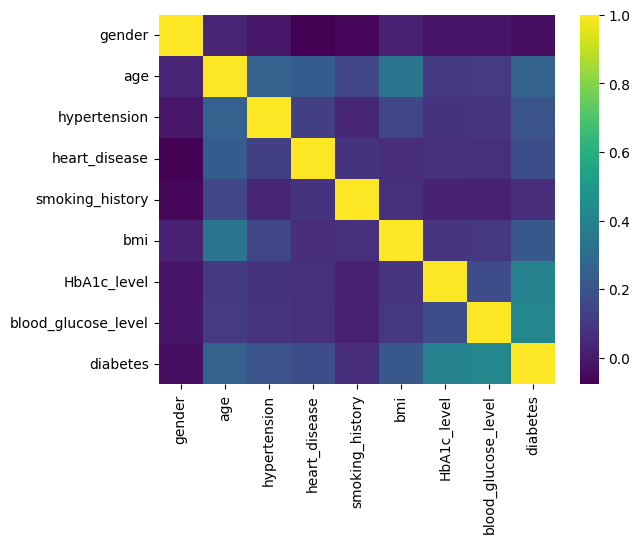

In [12]:
sns.heatmap(df.corr(),cmap='viridis')

In [13]:
y=df['diabetes']
x=df.drop('diabetes',axis=1,inplace=True)
x = df

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [36]:
x_test.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()
model.fit(x_train,y_train)
#

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,precision_score,recall_score

In [41]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.9326
